In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import random
import matplotlib.pyplot as plt

In [15]:
cifardataset=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifardataset.load_data()

In [16]:
print("Training data Size:",len(x_train))

Training data Size: 50000


In [17]:
print("Testing data Size:",len(x_test))

Testing data Size: 10000


In [18]:
print("Matrix of 0th position:\n",x_train[0])

Matrix of 0th position:
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


visuaization of Image:



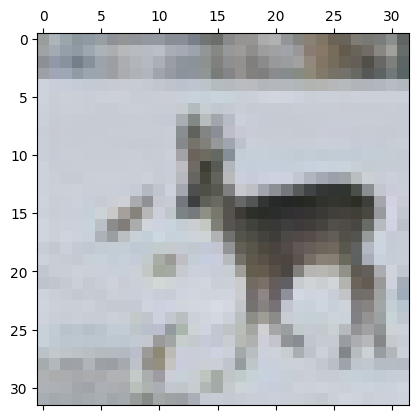

In [21]:
print("visuaization of Image:\n",)
plt.matshow(x_train[20])

In [22]:
x_train=x_train/255
y_train=y_train/255

visuaization of Image After Normalization:



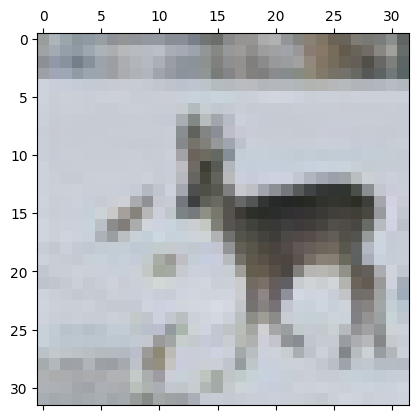

In [24]:
print("visuaization of Image After Normalization:\n",)
plt.matshow(x_train[20])

visuaization of Image After Normalization:



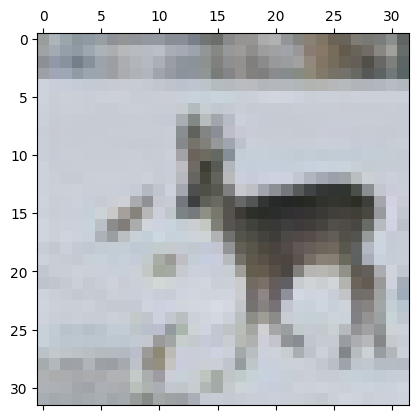

In [23]:
print("visuaization of Image After Normalization:\n",)
plt.matshow(x_train[20])

Define the Model

In [33]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128,activation="sigmoid"),
    keras.layers.Dense(10,activation="softmax")
])

Compile the Model

In [34]:
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

Train the Model

In [35]:
history=model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0988 - loss: 0.0379 - val_accuracy: 0.1000 - val_loss: 11.3975
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0993 - loss: 6.5846e-04 - val_accuracy: 0.1000 - val_loss: 11.9688
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1005 - loss: 3.6060e-04 - val_accuracy: 0.1000 - val_loss: 12.3040
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1010 - loss: 2.5026e-04 - val_accuracy: 0.1000 - val_loss: 12.5425
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0991 - loss: 1.9515e-04 - val_accuracy: 0.1000 - val_loss: 12.7277
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0989 - loss: 1.5398e-04 - val_accuracy: 0.1000 - val_loss: 12.8803
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0993 - loss: 1.3019e-04 - val_accuracy: 0.1000 - val_loss: 13.0089
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - ac

Evaluate the Model

In [36]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1001 - loss: 13.3121


In [37]:
print("\nLoss is: %.3f" % test_loss)
print("\nAccuracy is: %.3f" % test_accuracy)


Loss is: 13.309

Accuracy is: 0.100


In [43]:
class_names = [
 'aeroplane', 'automobile', 'bird', 'cat', 'deer',
 'dog', 'frog', 'horse', 'ship', 'truck'
]

In [39]:
n=random.randint(0,len(x_test)-1)

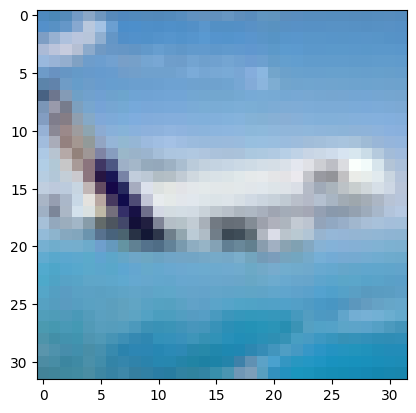

In [40]:
plt.imshow(x_test[n])

In [41]:
predicted_value=model.predict(np.expand_dims(x_test[n],axis=0))
predicted_class=np.argmax(predicted_value)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


In [44]:
print("Predicted_class:",class_names[predicted_class])

Predicted_class: aeroplane


Plotting the Graph

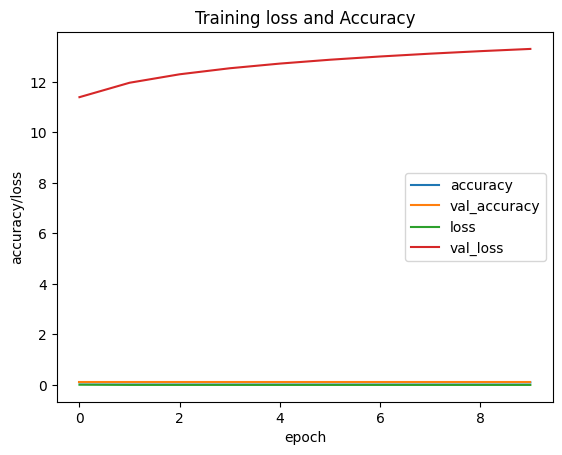

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training loss and Accuracy")
plt.ylabel("accuracy/loss")
plt.xlabel("epoch")
plt.legend(["accuracy","val_accuracy","loss","val_loss"])
plt.show()